In [2]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# importing Data Preparation libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing libraries for Model building 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import xgboost as xgb


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style="whitegrid")


pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)



# 1. Read Data

In [3]:
df = pd.read_csv('training_data  (1).csv')
df.head()

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,race_jaccard,economy_jaccard,foreign_jaccard,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,illness_jaccard,ideology_jaccard,education_jaccard,gender_jaccard,social_cosine,politics_cosine,politics_democratic_love_cosine,nationalistic_cosine,politics_republican_hate_cosine,entertainment_cosine,sports_cosine,race_cosine,economy_cosine,foreign_cosine,religion_cosine,health_cosine,politics_republican_love_cosine,health_technology_cosine,politics_democratic_hate_cosine,domestic_cosine,illness_cosine,ideology_cosine,education_cosine,gender_cosine,social_intersection,politics_intersection,politics_democratic_love_intersection,nationalistic_intersection,politics_republican_hate_intersection,entertainment_intersection,sports_intersection,race_intersection,economy_intersection,foreign_intersection,religion_intersection,health_intersection,politics_republican_love_intersection,health_technology_intersection,politics_democratic_hate_intersection,domestic_intersection,illness_intersection,ideology_intersection,education_intersection,gender_intersection,core_jaccard_normalized,core_cosine_normalized,core_intersection_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,education_jaccard_normalized,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized,ideology_cosine_normalized,race_cosine_normalized,economy_cosine_normalized,sports_cosine_normalized,foreign_cosine_normalized,domestic_cosine_normalized,nationalistic_cosine_normalized,politics_democratic_love_cosine_normalized,health_technology_cosine_normalized,education_cosine_normalized,gender_cosine_normalized,religion_cosine_normalized,social_cosine_normalized,politics_republican_love_cosine_normalized,politics_cosine_normalized,entertainment_cosine_normalized,politics_republican_hate_cosine_normalized,politics_democratic_hate_cosine_normalized,health_cosine_normalized,illness_cosine_normalized,ideology_intersection_normalized,race_intersection_normalized,economy_intersection_normalized,sports_intersection_normalized,foreign_intersection_normalized,domestic_intersection_normalized,nationalistic_intersection_normalized,politics_democratic_love_intersection_normalized,health_technology_intersection_normalized,education_intersection_normalized,gender_intersection_normalized,religion_intersection_normalized,social_intersection_normalized,politics_republican_love_intersection_normalized,politics_intersection_normalized,entertainment_intersection_normalized,politics_republican_hate_intersection_normalized,politics_democratic_hate_intersection_normalized,health_intersection_normalized,illness_intersection_normalized,total_pop,percent_25_34,percent_highschool,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.00000,0.000000,0.000011,0.000151,0.000053,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000125,0.0,0.0,0.000047,0.00000,0.0,0.000000,0.0,0.000054,0.000902,0.000154,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000356,0.0,0.0,0.000522,0.000000,0.0,0.000000,0

In [4]:
# Print number of datapoints
print("Shape of original dataframe: ", df.shape)
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Shape of original dataframe:  (3141, 144)
Number of rows:  3141
Number of columns:  144


In [5]:
# Get datatypes for each column
df.dtypes

county                                               object
cases                                                 int64
deaths                                                int64
date_index_converted                                 object
county_data_length                                    int64
core_jaccard                                        float64
core_cosine                                         float64
core_intersection                                   float64
social_jaccard                                      float64
politics_jaccard                                    float64
politics_democratic_love_jaccard                    float64
nationalistic_jaccard                               float64
politics_republican_hate_jaccard                    float64
entertainment_jaccard                               float64
sports_jaccard                                      float64
race_jaccard                                        float64
economy_jaccard                         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Columns: 144 entries, county to percent_white
dtypes: float64(134), int64(8), object(2)
memory usage: 3.5+ MB


In [7]:
#Checking the unique values
df.nunique().sort_values(ascending=False).head()

entertainment_cosine_normalized    1596
entertainment_cosine               1596
social_cosine                      1508
social_cosine_normalized           1508
sports_cosine                      1475
dtype: int64

In [8]:
#checking the missing values
df.isnull().sum()

county                                              0
cases                                               0
deaths                                              0
date_index_converted                                0
county_data_length                                  0
core_jaccard                                        0
core_cosine                                         0
core_intersection                                   0
social_jaccard                                      0
politics_jaccard                                    0
politics_democratic_love_jaccard                    0
nationalistic_jaccard                               0
politics_republican_hate_jaccard                    0
entertainment_jaccard                               0
sports_jaccard                                      0
race_jaccard                                        0
economy_jaccard                                     0
foreign_jaccard                                     0
religion_jaccard            

There is no missing values in the dataset.

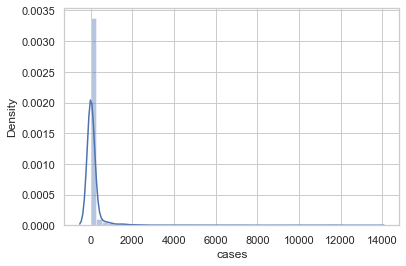

In [9]:
# Distribution plot for cases
sns.distplot(df['cases'])
plt.show()

In [10]:
# Get all columns that have an object data type
object_columns = df.select_dtypes(include=['object']).columns

# Print the names of the columns that have an object data type
print(object_columns)

Index(['county', 'date_index_converted'], dtype='object')


In [11]:
df['date_index_converted']

0        day_10
1       day_105
2        day_90
3        day_85
4         day_7
         ...   
3136     day_81
3137     day_55
3138    day_106
3139      day_1
3140     day_60
Name: date_index_converted, Length: 3141, dtype: object

In [12]:
# Strip "day_" from date_index_converted column and convert it into integer
df['date_index_converted'] = df['date_index_converted'].str.replace('day_', '').astype('int64')


In [13]:
df = df.rename(columns={'date_index_converted': 'days'})


In [14]:
df['days'].dtypes

dtype('int64')

In [15]:
# convert column to numeric type
df['days'] = pd.to_numeric(df['days'], errors='coerce')

In [16]:
df['days'].isnull().sum()

0

In [17]:
# Get all columns that have an int64 data type
int_columns = df.select_dtypes(include=['int64']).columns

# Print the names of the columns that have an int64 data type
print(int_columns)

Index(['cases', 'deaths', 'days', 'county_data_length', 'total_pop',
       'median_housing_cost', 'median_household_earnings',
       'median_worker_earnings', 'median_property_value'],
      dtype='object')


In [18]:
# Get all columns that have a float64 data type
float_columns = df.select_dtypes(include=['float64']).columns

# Print the names of the columns that have a float64 data type
print(float_columns)

Index(['core_jaccard', 'core_cosine', 'core_intersection', 'social_jaccard',
       'politics_jaccard', 'politics_democratic_love_jaccard',
       'nationalistic_jaccard', 'politics_republican_hate_jaccard',
       'entertainment_jaccard', 'sports_jaccard',
       ...
       'health_intersection_normalized', 'illness_intersection_normalized',
       'percent_25_34', 'percent_highschool', 'labor_force_rate',
       'unemployment_rate', 'percent_insured', 'percent_married',
       'poverty_rate', 'percent_white'],
      dtype='object', length=134)


In [19]:
# Columns having single value?
df.columns[df.nunique() == 0]

Index([], dtype='object')

There is no single value in the dataset

In [20]:
# Drop duplicate values if any

df.drop_duplicates()
print(df.shape)

(3141, 144)


There is no duplicate values in the dataset.

# 2. Exploratory Data Analysis

In [21]:
# Get the column names which contain missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print(missing_cols)

[]


We have no missing values across all columns.

In [22]:
df.describe()

,cases,deaths,days,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,race_jaccard,economy_jaccard,foreign_jaccard,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,illness_jaccard,ideology_jaccard,education_jaccard,gender_jaccard,social_cosine,politics_cosine,politics_democratic_love_cosine,nationalistic_cosine,politics_republican_hate_cosine,entertainment_cosine,sports_cosine,race_cosine,economy_cosine,foreign_cosine,religion_cosine,health_cosine,politics_republican_love_cosine,health_technology_cosine,politics_democratic_hate_cosine,domestic_cosine,illness_cosine,ideology_cosine,education_cosine,gender_cosine,social_intersection,politics_intersection,politics_democratic_love_intersection,nationalistic_intersection,politics_republican_hate_intersection,entertainment_intersection,sports_intersection,race_intersection,economy_intersection,foreign_intersection,religion_intersection,health_intersection,politics_republican_love_intersection,health_technology_intersection,politics_democratic_hate_intersection,domestic_intersection,illness_intersection,ideology_intersection,education_intersection,gender_intersection,core_jaccard_normalized,core_cosine_normalized,core_intersection_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,education_jaccard_normalized,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized,ideology_cosine_normalized,race_cosine_normalized,economy_cosine_normalized,sports_cosine_normalized,foreign_cosine_normalized,domestic_cosine_normalized,nationalistic_cosine_normalized,politics_democratic_love_cosine_normalized,health_technology_cosine_normalized,education_cosine_normalized,gender_cosine_normalized,religion_cosine_normalized,social_cosine_normalized,politics_republican_love_cosine_normalized,politics_cosine_normalized,entertainment_cosine_normalized,politics_republican_hate_cosine_normalized,politics_democratic_hate_cosine_normalized,health_cosine_normalized,illness_cosine_normalized,ideology_intersection_normalized,race_intersection_normalized,economy_intersection_normalized,sports_intersection_normalized,foreign_intersection_normalized,domestic_intersection_normalized,nationalistic_intersection_normalized,politics_democratic_love_intersection_normalized,health_technology_intersection_normalized,education_intersection_normalized,gender_intersection_normalized,religion_intersection_normalized,social_intersection_normalized,politics_republican_love_intersection_normalized,politics_intersection_normalized,entertainment_intersection_normalized,politics_republican_hate_intersection_normalized,politics_democratic_hate_intersection_normalized,health_intersection_normalized,illness_intersection_normalized,total_pop,percent_25_34,percent_highschool,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
count,3141.000000,3141.00000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,

Notice that the mean varies across the variables. Feature scaling will be required.

In [23]:
# # Check the outliers by plotting boxplot for some  numeric columns

# plt.figure(figsize=(10, 5))
# plt.subplot(4,2,1)
# sns.boxplot(y = 'cases', data = df)
# plt.subplot(4,2,2)
# sns.boxplot(y = 'deaths' , data = df)
# plt.subplot(4,2,3)
# sns.boxplot(y = 'days', data = df)
# plt.subplot(4,2,4)
# sns.boxplot(y = 'county_data_length', data = df)

# plt.show()

From the above box plot some variables contain outliers.

In [24]:
# #IQR to handle outliers
# # Selecting numerical columns
# cols=df.select_dtypes(exclude='object').columns


# Q1 = df[cols].quantile(0.05)
# Q3 = df[cols].quantile(0.95)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Cap outliers in all numeric variables with k-sigma technique

In [25]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [26]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [27]:
num_cols = df.select_dtypes(exclude='object').columns

In [28]:
num_cols


Index(['cases', 'deaths', 'days', 'county_data_length', 'core_jaccard',
       'core_cosine', 'core_intersection', 'social_jaccard',
       'politics_jaccard', 'politics_democratic_love_jaccard',
       ...
       'labor_force_rate', 'unemployment_rate', 'median_housing_cost',
       'median_household_earnings', 'median_worker_earnings',
       'percent_insured', 'percent_married', 'poverty_rate',
       'median_property_value', 'percent_white'],
      dtype='object', length=143)

In [29]:
# cap outliers in the numeric columns
df[num_cols] = df[num_cols].apply(cap_outliers, axis=0)

In [30]:
 df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,cases,deaths,days,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,race_jaccard,economy_jaccard,foreign_jaccard,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,illness_jaccard,ideology_jaccard,education_jaccard,gender_jaccard,social_cosine,politics_cosine,politics_democratic_love_cosine,nationalistic_cosine,politics_republican_hate_cosine,entertainment_cosine,sports_cosine,race_cosine,economy_cosine,foreign_cosine,religion_cosine,health_cosine,politics_republican_love_cosine,health_technology_cosine,politics_democratic_hate_cosine,domestic_cosine,illness_cosine,ideology_cosine,education_cosine,gender_cosine,social_intersection,politics_intersection,politics_democratic_love_intersection,nationalistic_intersection,politics_republican_hate_intersection,entertainment_intersection,sports_intersection,race_intersection,economy_intersection,foreign_intersection,religion_intersection,health_intersection,politics_republican_love_intersection,health_technology_intersection,politics_democratic_hate_intersection,domestic_intersection,illness_intersection,ideology_intersection,education_intersection,gender_intersection,core_jaccard_normalized,core_cosine_normalized,core_intersection_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,education_jaccard_normalized,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized,ideology_cosine_normalized,race_cosine_normalized,economy_cosine_normalized,sports_cosine_normalized,foreign_cosine_normalized,domestic_cosine_normalized,nationalistic_cosine_normalized,politics_democratic_love_cosine_normalized,health_technology_cosine_normalized,education_cosine_normalized,gender_cosine_normalized,religion_cosine_normalized,social_cosine_normalized,politics_republican_love_cosine_normalized,politics_cosine_normalized,entertainment_cosine_normalized,politics_republican_hate_cosine_normalized,politics_democratic_hate_cosine_normalized,health_cosine_normalized,illness_cosine_normalized,ideology_intersection_normalized,race_intersection_normalized,economy_intersection_normalized,sports_intersection_normalized,foreign_intersection_normalized,domestic_intersection_normalized,nationalistic_intersection_normalized,politics_democratic_love_intersection_normalized,health_technology_intersection_normalized,education_intersection_normalized,gender_intersection_normalized,religion_intersection_normalized,social_intersection_normalized,politics_republican_love_intersection_normalized,politics_intersection_normalized,entertainment_intersection_normalized,politics_republican_hate_intersection_normalized,politics_democratic_hate_intersection_normalized,health_intersection_normalized,illness_intersection_normalized,total_pop,percent_25_34,percent_highschool,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.0000

In [31]:
#Checking the shape of the dataframe  
df.shape


(3141, 144)

In [32]:
# #Find the number of cases across all counties
# plt.style.use('ggplot')
# plt.figure(figsize=(20,5))
# df['county'].value_counts().plot.bar()
# plt.show()

In [33]:
# ##Plot the bar plot across counties and cases
# plt.style.use('ggplot')
# plt.figure(figsize=(30,10))
# sns.barplot(data=df,x='county',y='cases')
# plt.xticks(rotation=90)
# plt.show()

Observation:

- Cases are high in some counties

In [34]:
# All numeric variables in the dataset
df_numeric = df.select_dtypes(include=['float64','int64'])
df_numeric.head()

,cases,deaths,days,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,race_jaccard,economy_jaccard,foreign_jaccard,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,illness_jaccard,ideology_jaccard,education_jaccard,gender_jaccard,social_cosine,politics_cosine,politics_democratic_love_cosine,nationalistic_cosine,politics_republican_hate_cosine,entertainment_cosine,sports_cosine,race_cosine,economy_cosine,foreign_cosine,religion_cosine,health_cosine,politics_republican_love_cosine,health_technology_cosine,politics_democratic_hate_cosine,domestic_cosine,illness_cosine,ideology_cosine,education_cosine,gender_cosine,social_intersection,politics_intersection,politics_democratic_love_intersection,nationalistic_intersection,politics_republican_hate_intersection,entertainment_intersection,sports_intersection,race_intersection,economy_intersection,foreign_intersection,religion_intersection,health_intersection,politics_republican_love_intersection,health_technology_intersection,politics_democratic_hate_intersection,domestic_intersection,illness_intersection,ideology_intersection,education_intersection,gender_intersection,core_jaccard_normalized,core_cosine_normalized,core_intersection_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,education_jaccard_normalized,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized,ideology_cosine_normalized,race_cosine_normalized,economy_cosine_normalized,sports_cosine_normalized,foreign_cosine_normalized,domestic_cosine_normalized,nationalistic_cosine_normalized,politics_democratic_love_cosine_normalized,health_technology_cosine_normalized,education_cosine_normalized,gender_cosine_normalized,religion_cosine_normalized,social_cosine_normalized,politics_republican_love_cosine_normalized,politics_cosine_normalized,entertainment_cosine_normalized,politics_republican_hate_cosine_normalized,politics_democratic_hate_cosine_normalized,health_cosine_normalized,illness_cosine_normalized,ideology_intersection_normalized,race_intersection_normalized,economy_intersection_normalized,sports_intersection_normalized,foreign_intersection_normalized,domestic_intersection_normalized,nationalistic_intersection_normalized,politics_democratic_love_intersection_normalized,health_technology_intersection_normalized,education_intersection_normalized,gender_intersection_normalized,religion_intersection_normalized,social_intersection_normalized,politics_republican_love_intersection_normalized,politics_intersection_normalized,entertainment_intersection_normalized,politics_republican_hate_intersection_normalized,politics_democratic_hate_intersection_normalized,health_intersection_normalized,illness_intersection_normalized,total_pop,percent_25_34,percent_highschool,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,0.0,0.0,10,363.0,0.000000,0.00000,0.000000,0.000011,0.000151,0.000053,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000125,0.0,0.0,0.000047,0.00000,0.0,0.000000,0.0,0.000054,0.000902,0.000154,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000356,0.0,0.0,0.000522,0.000000,0.0,0.000000,0.0,0.002755,0.013774,0.002755,

In [35]:
df_numeric.columns

Index(['cases', 'deaths', 'days', 'county_data_length', 'core_jaccard',
       'core_cosine', 'core_intersection', 'social_jaccard',
       'politics_jaccard', 'politics_democratic_love_jaccard',
       ...
       'labor_force_rate', 'unemployment_rate', 'median_housing_cost',
       'median_household_earnings', 'median_worker_earnings',
       'percent_insured', 'percent_married', 'poverty_rate',
       'median_property_value', 'percent_white'],
      dtype='object', length=143)

In [36]:
target_variable = ['cases']
selected_columns = ['deaths', 'county_data_length', 'total_pop', 'percent_25_34', 'percent_highschool','days',
                   'labor_force_rate', 'unemployment_rate', 'median_housing_cost', 'median_household_earnings',
                   'median_worker_earnings', 'percent_insured', 'percent_married', 'poverty_rate', 'median_property_value', 'percent_white']

In [37]:
# Pairwise scatter plot
#sns.pairplot(df[selected_columns + target_variable], kind="scatter")
#plt.show()

In [38]:
# lets define a function to plot cases across numerical variables
def plot_num(num_var):
    plt.figure(figsize=(20, 5))
    sns.barplot(x= num_var ,y="cases",data= df,palette="rocket", linewidth=5)
    plt.xticks(rotation=90)
    plt.show()

In [39]:
# Compare cases across different numerical variables
#plot_num('total_pop')
#plot_num('deaths')
#plot_num('labor_force_rate')
#plot_num('unemployment_rate')
#plot_num('percent_25_34')
#plot_num('percent_married')
#plot_num('days')
#plot_num('poverty_rate')
#plot_num('percent_white')
#plot_num('percent_highschool')
#plot_num('county_data_length')
#plot_num('median_worker_earnings')
#plot_num('percent_insured')
#plot_num('median_property_value')
#plot_num('median_housing_cost')
#plot_num('health_technology_jaccard')
#plot_num('illness_jaccard')
#plot_num('gender_jaccard')
#plot_num('sports_intersection_normalized')


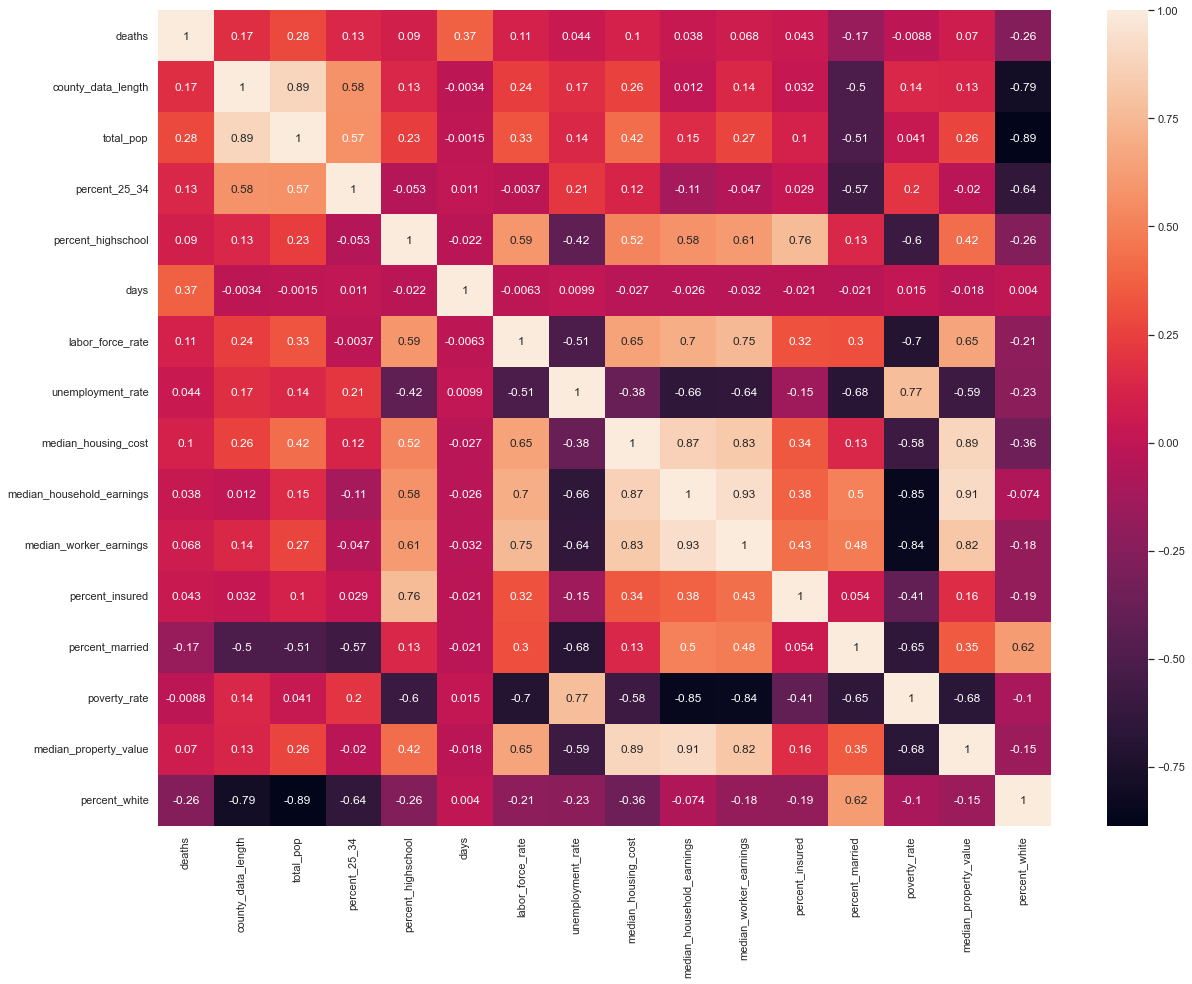

In [40]:
plt.figure(figsize = (20,15))
sns.heatmap(df[['deaths', 'county_data_length', 'total_pop', 'percent_25_34', 'percent_highschool','days',
                   'labor_force_rate', 'unemployment_rate', 'median_housing_cost', 'median_household_earnings',
                   'median_worker_earnings', 'percent_insured', 'percent_married', 'poverty_rate', 'median_property_value', 'percent_white']].corr(),annot =True)
plt.show()

**Observation:**
- some of the features are highly correlated and should be removed from the dataset.

In [41]:
# function to remove correlation more than a threshold value
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the datasetb

In [42]:
# dropping highly correlated columns
correlation(df,0.80)
df

,county,cases,days,county_data_length,core_jaccard,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,race_jaccard,economy_jaccard,foreign_jaccard,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,ideology_jaccard,education_jaccard,gender_jaccard,percent_25_34,percent_highschool,labor_force_rate,unemployment_rate,median_housing_cost,percent_insured,percent_married,poverty_rate,percent_white
0,Richland,0.0,10,363.0,0.000000,0.000011,0.000151,0.000053,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000125,0.00000,0.0,0.000047,0.0,0.000000,0.000000,12.1,86.9,55.5,7.5,675.0,90.5,48.3,15.6,0.868085
1,Lawrence,119.0,105,256.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000123,0.000016,0.0,0.000000,0.000000,0.000000,0.0,0.000195,0.00000,0.0,0.000000,0.0,0.000000,0.000000,11.8,85.9,53.5,6.5,655.0,92.2,49.3,18.6,0.954027
2,Wayne,49.0,90,769.0,0.000076,0.000039,0.000000,0.000000,0.0,0.00000,0.000000,0.000005,0.0,0.000010,0.000000,0.000018,0.0,0.000000,0.00000,0.0,0.000067,0.0,0.000022,0.000000,11.6,85.8,64.0,4.0,762.0,87.2,55.1,13.0,0.950541
3,Fayette,7.0,85,36.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000174,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,11.7,87.1,59.3,6.3,732.0,91.3,51.8,17.7,0.940054
4,Trumbull,0.0,7,554.0,0.000000,0.000046,0.000000,0.000000,0.0,0.00000,0.000088,0.000045,0.0,0.000026,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000038,0.0,0.000000,0.000000,11.1,89.0,56.4,5.9,661.0,91.7,49.1,17.2,0.885724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Summit,105.0,81,6121.0,0.000094,0.000041,0.000011,0.000003,0.0,0.00001,0.000041,0.000009,0.0,0.000013,0.000009,0.000015,0.0,0.000305,0.00001,0.0,0.000015,0.0,0.000008,0.000032,12.8,91.3,64.2,6.4,859.0,93.2,47.3,13.6,0.791435
3137,Fayette,0.0,55,28.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000103,0.000287,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,11.7,87.1,59.3,6.3,732.0,91.3,51.8,17.7,0.940054
3138,Clark,147.0,106,929.0,0.000013,0.000009,0.000012,0.000000,0.0,0.00000,0.000016,0.000009,0.0,0.000033,0.000000,0.000029,0.0,0.000000,0.00000,0.0,0.000005,0.0,0.000000,0.000000,11.4,87.2,60.6,7.7,736.0,92.7,48.1,16.6,0.865754
3139,Logan,0.0,1,144.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000058,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000088,0.0,0.000000,0.000000,10.9,90.3,62.5,5.8,766.0,90.7,55.2,13.7,0.949363


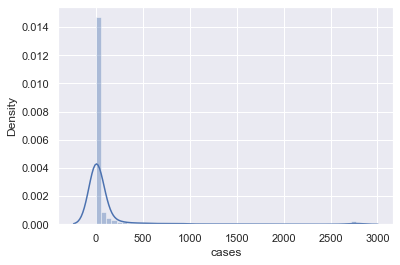

In [43]:
# Checking the Sale column distribution 
sns.set_style('darkgrid')
sns.distplot(df['cases'],color='b')
plt.show()


In [44]:
#Log Transformation
df['cases']=np.log1p(df['cases'])

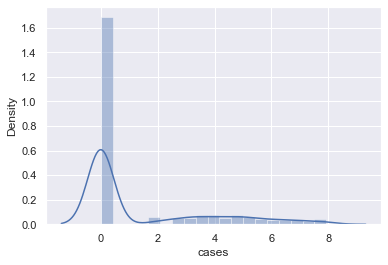

In [45]:
#Ploting the SalePrice again after log transformation
sns.set_style('darkgrid')
sns.distplot(df['cases'])
plt.show()

# Feature Engineeiring

### Splitting the Data into Training and Testing Sets

In [46]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['cases'], axis=1), # drop the target 
    df['cases'], # just the target
    test_size=0.3,
    random_state= 100)


In [47]:
print(X_train.shape)
print(X_test.shape)

(2198, 32)
(943, 32)


### Categorical Encoding

In [48]:
# first let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {
    k: i
    for i, k in enumerate(X_train['county'].unique
                          (), 0)
}

ordinal_mapping

{'Paulding': 0,
 'Lorain': 1,
 'Jackson': 2,
 'Trumbull': 3,
 'Champaign': 4,
 'Monroe': 5,
 'Hamilton': 6,
 'Darke': 7,
 'Preble': 8,
 'Shelby': 9,
 'Muskingum': 10,
 'Ashland': 11,
 'Henry': 12,
 'Highland': 13,
 'Miami': 14,
 'Logan': 15,
 'Morgan': 16,
 'Sandusky': 17,
 'Putnam': 18,
 'Belmont': 19,
 'Vinton': 20,
 'Huron': 21,
 'Holmes': 22,
 'Ross': 23,
 'Seneca': 24,
 'Williams': 25,
 'Marion': 26,
 'Adams': 27,
 'Portage': 28,
 'Auglaize': 29,
 'Morrow': 30,
 'Hardin': 31,
 'Pike': 32,
 'Guernsey': 33,
 'Delaware': 34,
 'Mahoning': 35,
 'Carroll': 36,
 'Wayne': 37,
 'Athens': 38,
 'Crawford': 39,
 'Clark': 40,
 'Tuscarawas': 41,
 'Summit': 42,
 'Perry': 43,
 'Brown': 44,
 'Franklin': 45,
 'Stark': 46,
 'Lucas': 47,
 'Knox': 48,
 'Greene': 49,
 'Wood': 50,
 'Mercer': 51,
 'Erie': 52,
 'Noble': 53,
 'Meigs': 54,
 'Clinton': 55,
 'Defiance': 56,
 'Medina': 57,
 'Coshocton': 58,
 'Jefferson': 59,
 'Geauga': 60,
 'Butler': 61,
 'Hocking': 62,
 'Columbiana': 63,
 'Hancock': 64,
 'Lak

In [49]:
X_train['days']

1808    75
2756    22
432     94
1958    77
433     31
        ..
1930    20
79      46
1859    32
2840    51
1544    81
Name: days, Length: 2198, dtype: int64

In [50]:
# replace the labels with the integers

X_train['county'] = X_train['county'].map(ordinal_mapping)
X_test['county'] = X_test['county'].map(ordinal_mapping)

# let's explore the result
X_train['county'].head(10)

1808    0
2756    1
432     2
1958    3
433     4
2251    5
2222    6
2011    7
2238    8
1329    9
Name: county, dtype: int64

In [51]:
(X_train.dtypes)

county                                int64
days                                  int64
county_data_length                  float64
core_jaccard                        float64
social_jaccard                      float64
politics_jaccard                    float64
politics_democratic_love_jaccard    float64
nationalistic_jaccard               float64
politics_republican_hate_jaccard    float64
entertainment_jaccard               float64
sports_jaccard                      float64
race_jaccard                        float64
economy_jaccard                     float64
foreign_jaccard                     float64
religion_jaccard                    float64
health_jaccard                      float64
politics_republican_love_jaccard    float64
health_technology_jaccard           float64
politics_democratic_hate_jaccard    float64
domestic_jaccard                    float64
ideology_jaccard                    float64
education_jaccard                   float64
gender_jaccard                  

### Feature Scalling

In [52]:
# using standard scalar for scaling
scaler = StandardScaler()

In [53]:
var = X_train.columns.tolist()


In [54]:
X_train[var] = scaler.fit_transform(X_train[var])

In [55]:
X_train

,county,days,county_data_length,core_jaccard,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,race_jaccard,economy_jaccard,foreign_jaccard,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,ideology_jaccard,education_jaccard,gender_jaccard,percent_25_34,percent_highschool,labor_force_rate,unemployment_rate,median_housing_cost,percent_insured,percent_married,poverty_rate,percent_white
1808,-1.693338,0.459413,-0.338139,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,-0.558966,-0.144222,-0.457089,-0.20077,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,-0.049243,0.346191,0.140579,-0.577292,-0.719137,0.247187,1.007843,-0.790940,0.440323
2756,-1.653318,-1.076014,0.255345,-0.449551,-0.256819,0.510749,0.062294,0.237910,1.281572,-0.276675,-0.468201,-0.144222,-0.344244,-0.20077,-0.370547,-0.100859,0.421009,-0.230975,0.537461,1.747336,-0.085649,0.437778,-0.215958,-0.410632,0.209483,0.214164,0.555189,0.689008,0.698930,-0.660112,-0.133152,-1.095576
432,-1.613299,1.009849,-0.319535,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,0.254671,-0.558966,-0.144222,-0.457089,-0.20077,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,0.671312,-0.085649,-0.284920,-0.215958,0.854230,-1.348983,-0.356117,2.706902,-0.678905,-0.861638,-0.238099,1.379761,0.741526
1958,-1.573279,0.517353,-0.159164,1.061069,1.096822,0.126169,-0.311427,-0.240141,-0.312710,-0.467217,-0.115433,-0.144222,-0.097474,-0.20077,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,1.366974,16.144863,-0.284920,-0.215958,-0.320284,0.072776,-0.797624,-0.067676,-0.712432,-0.286692,-0.640016,0.634268,-0.568869
433,-1.533259,-0.815281,-0.331441,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,-0.558966,-0.144222,-0.457089,-0.20077,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,-0.591326,0.264166,0.324541,0.725061,0.313503,0.616795,0.605926,-0.703235,0.363202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,-0.452726,-1.133955,-0.333674,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,3.589583,9.088720,-0.457089,-0.20077,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,5.569965,-0.215958,-1.133409,0.072776,-0.043382,0.441941,-0.551501,-0.820571,-0.579729,0.502710,0.656560
79,-0.972983,-0.380726,-0.350046,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,-0.558966,-0.144222,-0.457089,-0.20077,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,-0.681673,1.084411,1.557083,-1.766397,-0.155879,1.766687,2.193499,-1.558360,0.398658
1859,-1.693338,-0.786311,-0.347441,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,-0.558966,-0.144222,-0.457089,-0.20077,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,-0.049243,0.346191,0.140579,-0.577292,-0.719137,0.247187,1.007843,-0.790940,0.440323
2840,-1.253121,-0.235875,-0.306883,-0.449551,0.204237,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,-0.558966,-0.144222,-0.457089,-0.20077,-0.370547,-0.100859,2.624806,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,-0.681673,-0.091273,0.158976,-1.030284,-0.095530,-0.779503,0.103530,-0.023520,0.744691


In [56]:
# # scalar transform for test data
X_test[var] = scaler.transform(X_test[var])


In [57]:
X_test

,county,days,county_data_length,core_jaccard,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,politics_republican_hate_jaccard,entertainment_jaccard,sports_jaccard,race_jaccard,economy_jaccard,foreign_jaccard,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,ideology_jaccard,education_jaccard,gender_jaccard,percent_25_34,percent_highschool,labor_force_rate,unemployment_rate,median_housing_cost,percent_insured,percent_married,poverty_rate,percent_white
1167,-1.413200,1.125730,-0.320651,1.660395,0.494952,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,-0.558966,-0.144222,-0.457089,-0.200770,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,-1.043062,0.209483,0.526899,-0.520668,-0.497857,0.411457,0.987748,-0.593604,0.837508
1048,1.628301,-0.641459,-0.341488,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,4.081987,-0.558966,-0.144222,-0.457089,-0.200770,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,0.221799,-0.446713,-0.264136,0.158820,-0.236345,-0.450962,-0.097428,0.743899,0.289407
1920,0.667827,-1.336747,-0.281581,-0.449551,0.429087,-0.318697,-0.311427,-0.240141,-0.312710,-0.202401,-0.162219,-0.144222,-0.457089,-0.200770,1.067343,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,-1.043062,0.428215,-1.257528,1.064805,-0.980650,0.247187,-1.001742,0.721973,-0.117484
1739,-0.572785,0.430443,0.022417,2.513827,-0.170513,-0.318697,-0.311427,-0.240141,-0.312710,0.351798,-0.558966,-0.144222,0.081094,-0.200770,1.255167,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.093651,-0.215958,-0.320284,0.865679,0.876425,0.668437,0.863350,0.452525,-1.262988,0.042258,-0.187298
3137,1.628301,-0.119994,-0.344093,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,2.317863,4.819500,-0.144222,-0.457089,-0.200770,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,0.221799,-0.446713,-0.264136,0.158820,-0.236345,-0.450962,-0.097428,0.743899,0.289407
496,-1.453220,-0.380726,4.194666,-0.297463,-0.134173,0.377705,0.332522,0.262938,0.081043,0.094695,0.251371,0.896704,1.259142,-0.076579,-0.038726,-0.100859,0.277800,1.333698,1.438679,1.124243,1.456360,0.008282,0.436401,2.932216,0.482898,0.986802,0.555189,0.990754,0.123984,-1.946246,0.590415,-3.373796
1744,1.588282,-0.033083,-0.318046,-0.449551,1.421605,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,0.230785,-0.144222,5.338440,-0.200770,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,-1.494798,-0.638104,-0.871209,-0.633916,-1.007472,-0.574165,1.148514,0.305374,0.593099
1147,0.027511,-0.293815,-0.299814,-0.449551,-0.549805,-0.318697,-0.311427,-0.240141,-0.312710,-0.622335,-0.558966,-0.144222,-0.457089,-0.200770,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,-0.284920,-0.215958,0.041105,-1.130251,-0.613663,0.894933,-0.390570,-0.081354,0.445160,1.072793,0.819334
1247,0.267630,-0.177934,-0.173303,-0.449551,0.240576,0.652108,-0.311427,1.316651,-0.312710,0.220390,-0.403449,-0.144222,1.040893,-0.200770,0.201270,-0.100859,-0.304031,-0.230975,-0.143051,0.188352,-0.085649,0.884544,-0.215958,1.577007,1.111753,0.342937,-0.180924,1.319321,0.822133,-0.117524,-0.440120,-0.944910
1332,1.508242,1.473374,-0.114141,0.151963,-0.106919,-0.318697,0.657372,-0.240141,3.055429,-0.622335,-0.558966,-0.144222,-0.164436,-0.200770,-0.370547,-0.100859,-0.304031,-0.230975,-0.143051,-0.472277,-0.085649,0.020881,-0.215958,-0.139590,1.221119,0.986802,-0.860412,3.116383,1.314944,1.570527,-2.018812,-0.513634


#### Building the first model with all the features

In [58]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                               1.343862
county                             -0.056149
days                                1.702777
county_data_length                 -0.012519
core_jaccard                       -0.023291
social_jaccard                      0.028654
politics_jaccard                   -0.047308
politics_democratic_love_jaccard   -0.134549
nationalistic_jaccard               0.063406
politics_republican_hate_jaccard    0.104621
entertainment_jaccard               0.084343
sports_jaccard                      0.041179
race_jaccard                        0.000671
economy_jaccard                    -0.007952
foreign_jaccard                     0.050382
religion_jaccard                   -0.012095
health_jaccard                      0.139469
politics_republican_love_jaccard    0.045116
health_technology_jaccard          -0.019809
politics_democratic_hate_jaccard    0.035813
domestic_jaccard                   -0.028469
ideology_jaccard                   -0.022276
education_

In [59]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:20:14   Log-Likelihood:                -3884.9
No. Observations:                2198   AIC:                             7836.
Df Residuals:                    2165   BIC:                             8024.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.3439      0.030     44.128      0.000       1.284       1.404
county                              -0.0561      0.033     -1.677      0.094      -0.122       0.010
days                                 1.7028      0.033     50.963      0.000       1.637       1.768
county_data_length                  -0.0125      0.054     -0.231      0.817      -0.119       0.094
core_jaccard                        -0.0233      0.035     -0.666      0.506      -0.092       0.045
social_jaccard                       0.0287      0.033      0.858      0.391      -0.037       0.094
politics_jaccard                    -0.0473      0.032     -1.486      0.137      -0.110       0.015
politics_democratic_love_jaccard    -0.1345      0.031     -4.272      0.000      -0.196      -0.073
nationalistic_jaccard                0.0634      0.032      2.012      0.044       0.002       0.125
politics_republican_hate_jaccard     0.1046      0.031      3.337      0.001       0.043       0.166
entertainment_jaccard                0.0843      0.031      2.680      0.007       0.023       0.146
sports_jaccard                       0.0412      0.032      1.290      0.197      -0.021       0.104
race_jaccard                         0.0007      0.031      0.022      0.983      -0.060       0.062
economy_jaccard                     -0.0080      0.032     -0.245      0.807      -0.072       0.056
foreign_jaccard                      0.0504      0.032      1.576      0.115      -0.012       0.113
religion_jaccard                    -0.0121      0.032     -0.382      0.702      -0.074       0.050
health_jaccard                       0.1395      0.032      4.404      0.000       0.077       0.202
politics_republican_love_jaccard     0.0451      0.033      1.373      0.170      -0.019       0.110
health_technology_jaccard           -0.0198      0.032     -0.628      0.530      -0.082       0.042
politics_democratic_hate_jaccard     0.0358      0.032      1.103      0.270      -0.028       0.099
domestic_jaccard                    -0.0285      0.032     -0.891      0.373      -0.091       0.034
ideology_jaccard                    -0.0223      0.031     -0.720      0.472      -0.083       0.038
education_jaccard                   -0.0533      0.032     -1.676      0.094      -0.116       0.009
gender_jaccard                      -0.1229      0.031     -3.949      0.000      -0.184      -0.062
percent_25_34                       -0.1235      0.047     -2.615      0.009      -0.216      -0.031
percent_highschool                   0.1635      0.069      2.354      0.019       0.027       0.300
labor_force_rate                    -0.0291      0.055     -0.526      0.599      -0.138       0.079
unemployment_rate                   -0.0280      0.06

This model has an Adjusted R-squared value of 75.3% which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

### Model Building Using PCA


In [60]:
# fitting pca model
pca = PCA(random_state=42)
pca.fit(X_train)
# pca components
pca.components_

array([[ 0.07590663, -0.01252781,  0.02644023, ...,  0.25052951,
        -0.44992437, -0.0571848 ],
       [ 0.0745255 ,  0.0301719 ,  0.43127457, ..., -0.40096773,
         0.13390156, -0.47721077],
       [ 0.01107159,  0.465461  , -0.14063146, ...,  0.08062906,
         0.01885103,  0.14715394],
       ...,
       [-0.00537998, -0.00239665, -0.35147532, ...,  0.15834667,
        -0.46966717, -0.6794763 ],
       [ 0.02798028,  0.0196684 , -0.25052469, ...,  0.50721514,
         0.69819726, -0.33832617],
       [ 0.0406888 , -0.00558105, -0.06798748, ..., -0.32287005,
         0.09140217, -0.16775335]])

In [61]:
# calculating cumulative variances
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [62]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      12.48
1      23.43
2      28.53
3      33.17
4      37.35
5      41.22
6      44.91
7      48.54
8      51.99
9      55.43
10     58.64
11     61.80
12     64.88
13     67.88
14     70.80
15     73.60
16     76.37
17     79.03
18     81.58
19     84.03
20     86.37
21     88.67
22     90.86
23     92.86
24     94.65
25     96.12
26     97.35
27     98.17
28     98.88
29     99.38
30     99.70
31    100.00
dtype: float64


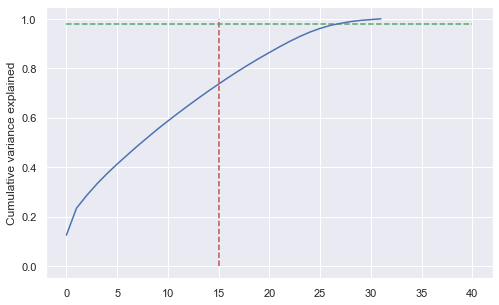

In [63]:
fig = plt.figure(figsize=[8,5])
plt.vlines(x= 15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()


In [64]:
pca_again = PCA(0.98)

In [65]:
X_train_pca = pca_again.fit_transform(X_train)

In [66]:
X_train_pca.shape

(2198, 28)

In [67]:
learner_pca = LinearRegression()

In [68]:
model_pca = learner_pca.fit(X_train_pca, y_train)

In [69]:
X_test_pca = pca_again.transform(X_test)

In [70]:
X_test_pca.shape

(943, 28)

In [71]:
pred_probs_test = model_pca.predict(X_test_pca)

In [72]:
r2_score(y_test, pred_probs_test)

0.6068997592318874

### Using Decision Trees

In [73]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [74]:
dt.fit(X_train_pca, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [75]:
y_train_pred = dt.predict(X_train_pca)
print("r2_score in train: " ,r2_score(y_train, y_train_pred))
y_test_pred = dt.predict(X_test_pca)
print("r2_score in test: " ,r2_score(y_test, y_test_pred))


r2_score in train:  0.5534934297682956
r2_score in test:  0.4253594311001686


In [76]:
dt1 = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [77]:
dt1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [78]:
y_train_pred = dt1.predict(X_train)
print("r2_score in train: " ,r2_score(y_train, y_train_pred))
y_test_pred = dt1.predict(X_test)
print("r2_score in test: " ,r2_score(y_test, y_test_pred))


r2_score in train:  0.9005115165692831
r2_score in test:  0.8860473636738432


## Hyperparameter tuning using Grid Search CV 

In [79]:
# dt1 = DecisionTreeRegressor(random_state = 42)

In [80]:
# param_grid = {'max_depth': [2, 3, 4, 5],
#               'min_samples_split': [2, 3, 4],
#               'min_samples_leaf': [1, 2, 3],
#               'criterion': ['mse', 'mae']}


In [81]:
# grid_search = GridSearchCV(dt1, param_grid, cv=5,verbose=1)

In [82]:
#grid_search.fit(X_train_pca, y_train)


In [83]:
# Print the best hyperparameters
#print("Best hyperparameters:", grid_search.best_params_)

In [84]:
# Print the R^2 score on the testing data
#print("R^2 score:", grid_search.score(X_test_pca, y_test))

### By Using XGBoost

In [85]:
# Instantiate XGBRegressor class and set hyperparameters
xgb_reg = xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=5)


In [86]:
# Fit the model to the training data
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [87]:
# Make predictions on the test data
xgb_pred = xgb_reg.predict(X_test)

In [88]:
r2_score(y_test, xgb_pred)

0.9699416634101744

### HPT - Random Search

In [89]:
# define XGBoost Regressor and hyperparameters to tune
xgb_model = xgb.XGBRegressor()

# A parameter grid for XGBoost
params = {
        'n_estimators' : [100,200,300,400,500,600], # no of trees 
        'learning_rate' : [0.05,0.07,0.1, 0.15],  # eta
        'max_depth': [3, 4, 5,6,7]
        }



In [90]:
grid_search = GridSearchCV(xgb_model, param_grid=params,cv=5, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [94]:
# evaluate the model on the testing set with the best hyperparameters
best_model = grid_search.best_estimator_
xgb_pred_hpt = best_model.predict(X_test)

In [95]:
r2 = r2_score(y_test, xgb_pred_hpt)

0.9708714273022689

In [ ]:
print('R2 Score:', np.round(r2, 4))

### Using Random Forest

In [97]:
rf = RandomForestRegressor(n_estimators= 600, max_depth= 70, max_features= 10, random_state= 42, oob_score=True)





In [98]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 4.7 s
Wall time: 5.68 s


RandomForestRegressor(max_depth=70, max_features=10, n_estimators=600,
                      oob_score=True, random_state=42)

In [99]:
print("oob_score_",rf.oob_score_)

oob_score_ 0.9493053380977302


In [101]:
y_train_pred = rf.predict(X_train)
print("r2_score train: ",r2_score(y_train, y_train_pred))
y_test_pred = rf.predict(X_test)
print("r2_score test: ",r2_score(y_test, y_test_pred))

r2_score train:  0.9931530715722076
r2_score test:  0.9510068617371761


### Using Random Forest with PCA

In [253]:
rf = RandomForestRegressor(n_estimators= 600, max_depth= 70, max_features= 10, random_state= 42, oob_score=True)

%%time
rf.fit(X_train_pca, y_train)

print("oob_score_",rf.oob_score_)

In [256]:
rf.fit(X_train_pca,y_train)
y_train_pred = rf.predict(X_train_pca)
print("r2_score train: ",r2_score(y_train, y_train_pred))
y_test_pred = rf.predict(X_test_pca)
print("r2_score test: "r2_score(y_test, y_test_pred)

RandomForestRegressor(max_depth=70, max_features=10, n_estimators=600,
                      oob_score=True, random_state=42)

####  RandomForest with Hyperparameter tuning

In [102]:
# Create a RandomForestRegressor object
rf1 = RandomForestRegressor()

In [103]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600],
              'max_depth': [2, 3, 4, 5, 6, 7],
              'min_samples_split': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': ['auto', 'sqrt', 'log2']}

In [104]:
# Create a GridSearchCV object
grid_search = GridSearchCV(rf1, param_grid, cv=5)


In [ ]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


In [85]:
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
y_train_pred = grid_search.predict(X_train)
print("r2_score train: ",grid_search.score(y_train, y_train_pred))

In [86]:
# Print the R^2 score on the testing data
print("r2_score score test: ", grid_search.score(X_test, y_test))

### Using XGBoost

In [750]:
# build initial model using all the features
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# fit the model with the selected features
model.fit(X_train, y_train)

# make predictions
y_pred_test = model.predict(X_test)

# calculate r2 score
r2_final = r2_score(y_test, y_pred_test)
print('Test selected features r2 = %f' % (r2_final))

Test selected features r2 = 0.801924


In [751]:
# build initial model using all the features
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# fit the model with the selected features
model.fit(X_train_pca, y_train)

# make predictions
y_pred_test = model.predict(X_test_pca)

# calculate r2 score
r2_final = r2_score(y_test, y_pred_test)
print('Test selected features r2 = %f' % (r2_final))

Test selected features r2 = 0.489803
